<a href="https://colab.research.google.com/github/DRSLima/sentiment-analysis-twitter/blob/master/Text%20Classification%20-%20Portugues%20-%20NLP_Cl%C3%A1ssico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
#Começando os trabalhos

import pandas as pd

df_train = pd.read_csv('https://raw.githubusercontent.com/jpvmm/FASAM_NLP/master/train_sample.csv')
df_train.head()

,title,label_quality,language,category
0,Microscópio Biológico Binocular Meopta Profiss...,unreliable,portuguese,MICROSCOPES
1,Nissan Versa,unreliable,portuguese,CLASSIC_CARS
2,Llave Contacto Yamaha Fz 16 + Tapa Tanque Mpr,unreliable,spanish,MOTORCYCLE_IGNITION_SWITCHES
3,Mini Pci Wireless + Bluetooth Samsung Np305e4a...,unreliable,portuguese,NETWORK_CARDS
4,Disyuntor Diferencial Bipolar 25a (30ma),unreliable,spanish,CIRCUIT_BREAKERS


In [29]:
df_test = pd.read_csv('https://raw.githubusercontent.com/jpvmm/FASAM_NLP/master/test_sample.csv')
df_test.head()

,id,title,language
0,116027,Barril De Cerveza,spanish
1,217961,Chicote Alimentação De 16 Vias Para Dvd Cyber ...,portuguese
2,244858,Creme De Barbear Fixmodell,portuguese
3,127555,Cascata Para Piscinas Inox Canyon - Sodramar,portuguese
4,30626,Sillas Galana Con Patas De Caño Varios Colores,spanish


# **Análise Exploratória de Dados**


---
Vamos dar uma olhada o que tem nesse dataset

* Quantos pontos de dados esse dataset possui?
* Quantas categorias diferentes os títulos possuem?
* Quantos pontos de dados temos por língua?
* Quantos pontos de dados por label quality?

In [31]:
#Pontos de dados
df_train['category'].count()

35000

In [32]:
#Quantas categorias únicas temos?
df_train['category'].nunique()

1550

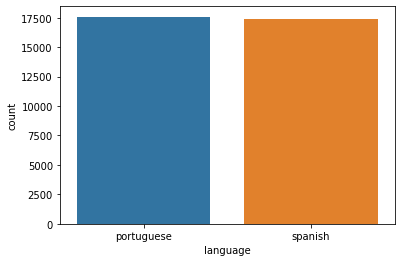

In [33]:
import seaborn as sns
sns.countplot(df_train['language'])

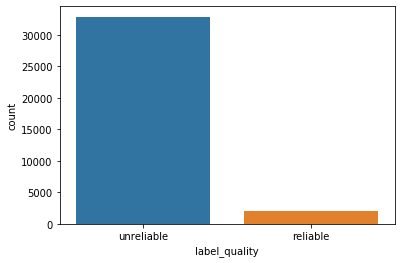

In [34]:
sns.countplot(df_train['label_quality'])

## Conclusões de EDA:
* Duas linguas!
* Dataset bem distribuído entre as linguagens;
* Grande quantidade de labels;

# **Começando os trabalhos**


---
**Pergunta**: Como podemos trabalhar com duas linguages diferentes? Qual estratégia poderia ser adotada?


In [0]:
df_port = df_train[df_train['language']=='portuguese']
df_spani = df_train[df_train['language']=='spanish']

In [36]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [37]:
#Alguns exemplos de stopwords
stops = set(stopwords.words('portuguese'))

stops

{'a',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'até',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'estamos',
 'estas',
 'estava',
 'estavam',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivéramos',
 'estivéssemos',
 'estou',
 'está',
 'estávamos',
 'estão',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fui',
 'fôramos',
 'fôssemos',
 'haja',
 'hajam',
 'hajamos',
 'havemos',
 'hei',
 'houve',
 'houvemos',
 'houver',
 'houvera',
 'houveram',
 'houverei',
 'houverem',
 'houveremos',
 'houveria',
 'houveriam',
 'houvermos',
 'houverá',
 'houverão',
 'houveríamos',
 'houvesse',


In [0]:
#Função pra limpeza de documentos
import re
import string
def limpaTexto(texto):

  #Aqui realizamos a tokenização e normalização de textos

  tokens = texto.split()

  #Regex para filtro de caracteres
  re_puc = re.compile('[%s]' % re.escape(string.punctuation)) # a funcao do scape ignora a pontuacao do texto
  #Remoção de pontuação
  tokens = [re_puc.sub('', w ) for w in tokens]
  #Remoção de tokens não alfabéticos
  tokens = [word for word in tokens if word.isalpha()] #se a palavra eh alfanumerica pega a palavra
  #Remoção de stopwords
  stop_words = set(stopwords.words('portuguese')) # aplica as stopwords no texto tratado

  tokens = [w for w in tokens if not w in stop_words]
  tokens = [word for word in tokens if len(word) > 1]
  tokens = ' '.join(tokens) # une novamente as palavras numa linha

  return tokens


In [39]:
df_port['title'] = df_port['title'].apply(limpaTexto)

df_port.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,title,label_quality,language,category
0,Microscópio Biológico Binocular Meopta Profiss...,unreliable,portuguese,MICROSCOPES
1,Nissan Versa,unreliable,portuguese,CLASSIC_CARS
3,Mini Pci Wireless Bluetooth Samsung,unreliable,portuguese,NETWORK_CARDS
6,Fim De Curso Portão Acabamento Aluminio,unreliable,portuguese,GATE_MOTORS
7,Toalha Picnic Pic Nic Xadrez Oxford Cores Dive...,unreliable,portuguese,TABLECLOTHS


In [0]:
y = df_port['category'].values
x = df_port['title']

In [0]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.1)

In [0]:
clf = Pipeline([('tfidf', TfidfVectorizer(lowercase=True, max_df=1, min_df=1, ngram_range=(1,1))),
                ('clf', LinearSVC())])

In [51]:
clf.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                 

In [47]:
y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred))

                                              precision    recall  f1-score   support

                                  3D_GLASSES       0.00      0.00      0.00         1
                                 ABS_SENSORS       0.00      0.00      0.00         1
                            AB_ROLLER_WHEELS       0.00      0.00      0.00         0
                                  ACCORDIONS       0.00      0.00      0.00         1
                            ACOUSTIC_GUITARS       1.00      1.00      1.00         2
                             ACOUSTIC_PANELS       1.00      1.00      1.00         1
                              ACTION_FIGURES       0.00      0.00      0.00         1
                              ADHESIVE_TAPES       0.50      1.00      0.67         2
                                      AGOGOS       0.00      0.00      0.00         0
                                     AIRBAGS       0.00      0.00      0.00         1
                              AIRBAG_MODULES       0.

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Desafio**

---



1 - Desenvolva um modelo para Espanhol;


2 - Tente melhorar os resultados de ambos os modelos.

## Modelo para Espanhol